In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lbg_forecast.population_model as pop
import lbg_forecast.noise as noise
import lbg_forecast.selection as sel
import lbg_forecast.nz_sim as nz
import lbg_forecast.lyalpha as ly
import os
from getdist import plots, MCSamples

In [2]:
def numpy_to_mcsamples(array, names, label):
    "convenience function used for plotting using getdist"
    samples = np.copy(array)
    samples[:, -1] = np.log10(samples[:, -1])
    samples[:, 8] = np.log10(samples[:, 8])
    return MCSamples(samples=samples, names=names, label=label)

def plot_samples(all, u, g, r):
    "plot triangle plot for sps parameters"
    plotter = plots.get_subplot_plotter()
    names = pop.sps_parameter_names()#["zred", "logzsol", "dust1", "dust2", "dust_index", 
            #          "igm_factor", "gas_logu", "logfagn", "agn_tau",
            #           "logf1", "logf2", "logf3", "logf4", "logf5","logf6", "logmass"]
    
    s1 = numpy_to_mcsamples(all, names, label = "global population")
    s2 = numpy_to_mcsamples(u, names, label = "u-dropouts")
    s3 = numpy_to_mcsamples(g, names, label = "g-dropouts")
    s4 = numpy_to_mcsamples(r, names, label = "r-dropouts")
    
    plotter.triangle_plot([s1, s2, s3, s4], Filled=False, contour_lws=2, colors=["black", "blue", "red", "green"], contour_colors=["black", "blue", "red", "green"])

In [3]:
#counts how many individual files of a given type there are (i.e. number of simulation runs)
files = os.listdir("simulation_data")
run_count = 0
for file in files:
    if("sps_parameters" in file):
        run_count+=1
print(run_count)

#loads files
sps_parameters = []
photometry = []
spectra = []
for run in range(run_count):
    sps_parameters.append(np.load("simulation_data/sps_parameters_"+str(run)+".npy"))
    photometry.append(np.load("simulation_data/simulated_photometry_"+str(run)+".npy"))
    spectra.append(np.load("simulation_data/spectra_"+str(run)+".npy"))
sps_parameters = np.vstack(sps_parameters)
photometry = np.vstack(photometry)
spectra = np.vstack(spectra)
wavelengths = np.load("simulation_data/wavelengths_0.npy")

10200


In [4]:
np.save("training_data/photometry_"+str(photometry.shape[0])+".npy", photometry)
np.save("training_data/sps_parameters_"+str(photometry.shape[0])+".npy", sps_parameters)
np.save("training_data/spectra_"+str(photometry.shape[0])+".npy", spectra)
np.save("training_data/wavelengths_0.npy", wavelengths)
photometry.shape

(51000000, 6)

In [5]:
sources = noise.get_noisy_magnitudes(sps_parameters, photometry, random_state=42)
colours = sel.colours(sources)
uparams, gparams, rparams = nz.apply_cuts(colours, return_all_params=True)
uparams.shape

(100257, 17)

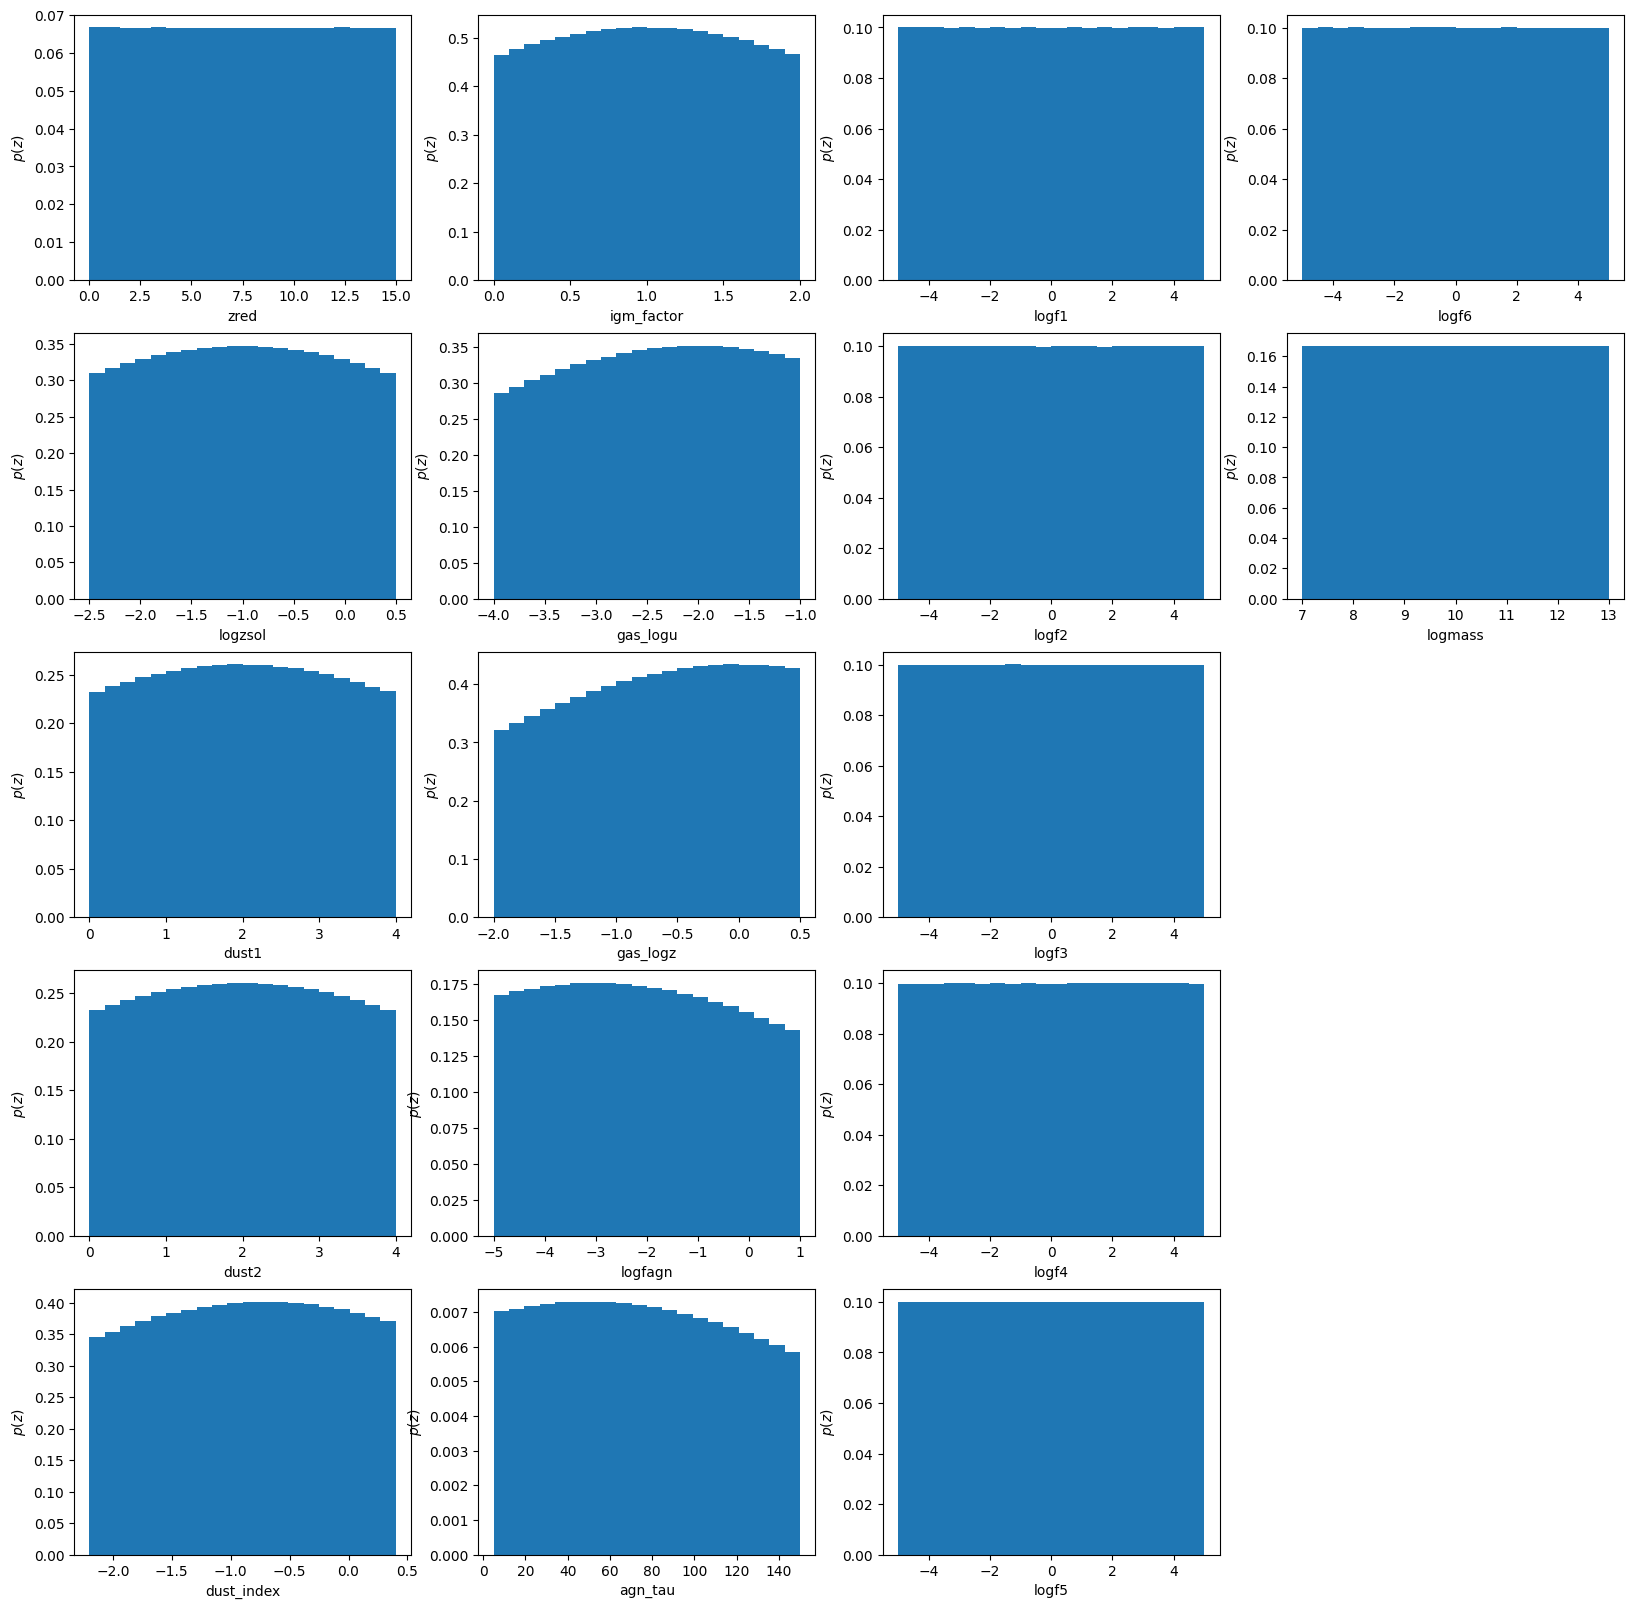

In [6]:
pop.plot_galaxy_population(sps_parameters)

(array([7.17194616e-02, 1.01223310e-01, 7.95662298e-02, 1.88165502e-01,
        1.60623346e-01, 1.29471676e-01, 4.35495636e-02, 1.85183730e-02,
        1.36533767e-02, 3.69582783e-02, 4.19802100e-02, 3.24856204e-02,
        2.03231297e-02, 7.14055908e-03, 3.13870729e-03, 2.04015974e-03,
        1.50657950e-02, 2.36187724e-02, 2.69928827e-02, 9.18856559e-02,
        2.80208093e-01, 2.30694986e-01, 9.71429906e-02, 4.33141606e-02,
        3.38980387e-02, 4.77083508e-02, 1.16053702e-01, 2.86799379e-01,
        5.27616695e-01, 8.03195195e-01, 9.13442289e-01, 7.94171412e-01,
        5.33266368e-01, 2.97000177e-01, 9.36904126e-02, 4.86499630e-02,
        3.24856204e-02, 1.93030498e-02, 2.35403047e-02, 3.99400503e-02,
        5.45350392e-02, 5.68890696e-02, 5.34364916e-02, 5.48489099e-02,
        5.77522141e-02, 6.43434994e-03, 3.29564265e-03, 2.19709510e-03,
        3.37411034e-03, 2.66790120e-03, 2.35403047e-03, 3.21717497e-03,
        1.96169206e-03, 1.88322437e-03, 2.04015974e-03, 1.647821

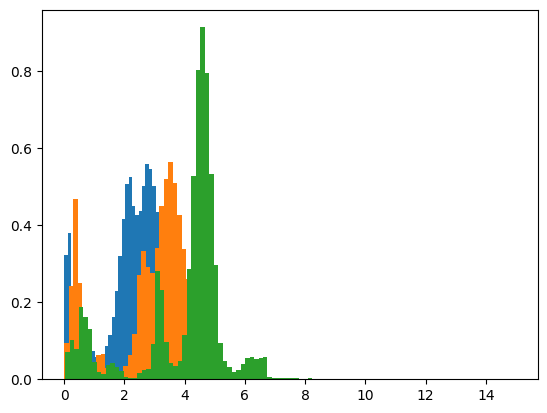

In [7]:
bins = 100
plt.hist(uparams[:, 0], bins=bins, density=True)
plt.hist(gparams[:, 0], bins=bins, density=True)
plt.hist(rparams[:, 0], bins=bins, density=True)

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


KeyboardInterrupt: 

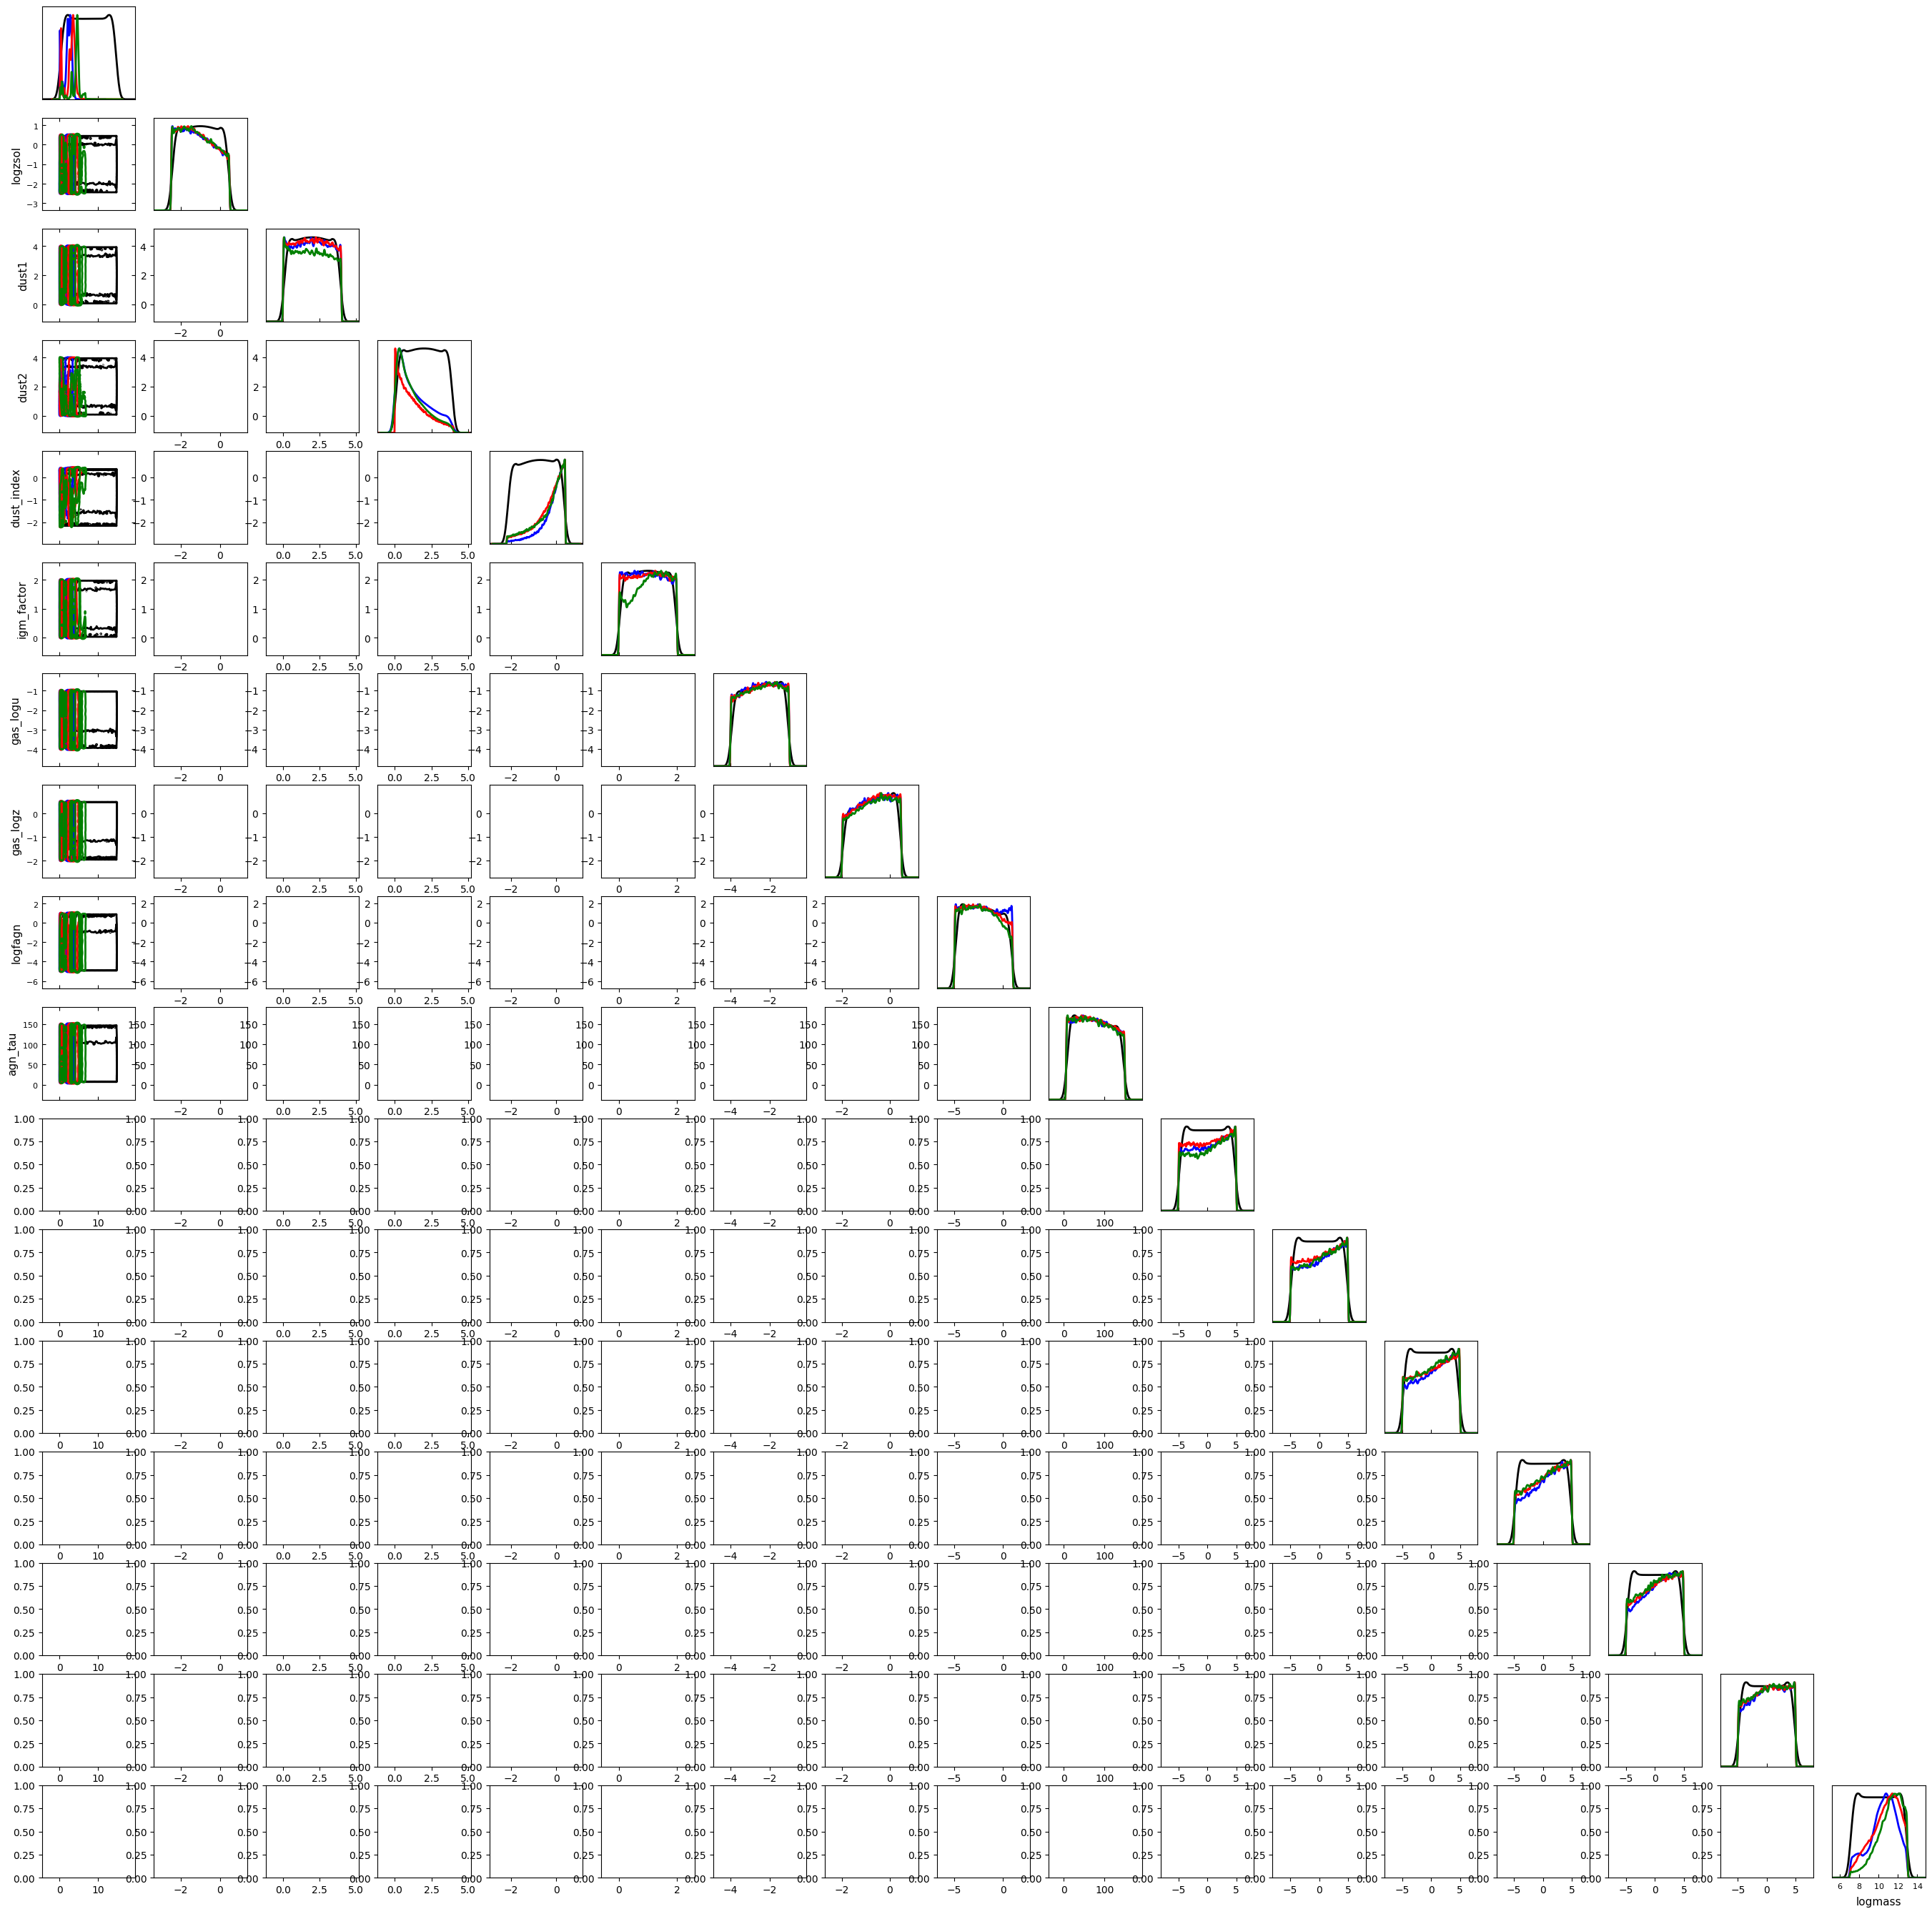

In [8]:
plot_samples(sps_parameters, uparams, gparams, rparams)